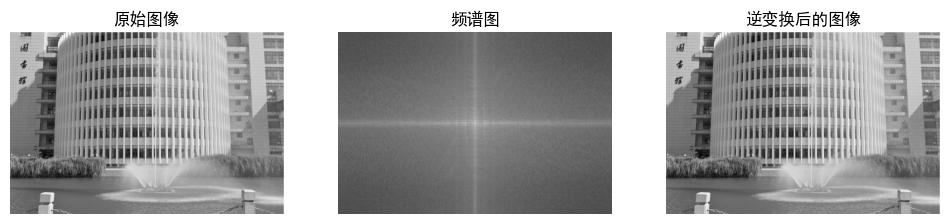

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. 读取灰度图像
image = cv2.imread("D:/picture/school.png", cv2.IMREAD_GRAYSCALE)

# 2. 计算DFT
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)  # 将频率从左上角移到中心

# 3. 计算频谱图
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))



# 4. 进行逆傅里叶变换
f_ishift = np.fft.ifftshift(dft_shift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题


# 5. 显示原图和频谱图和逆变换的图像
plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('原始图像')
plt.axis('off')

plt.subplot(132)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('频谱图'), plt.axis('off')

plt.subplot(133),
plt.imshow(img_back, cmap='gray')
plt.title('逆变换后的图像')
plt.axis('off')
plt.show()


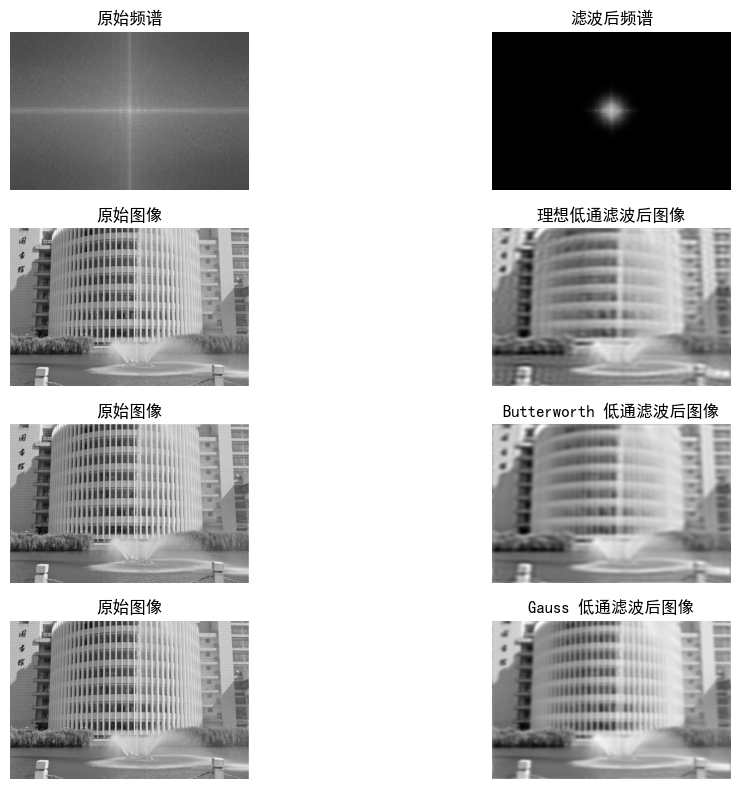

In [2]:
import cv2
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt

# 读取图像
image = cv2.imread("D:/picture/school.png", cv2.IMREAD_GRAYSCALE)

# 1. 快速傅里叶变换 (FFT)
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)  # 将零频率分量移到频谱中心
fimg = np.log(np.abs(fshift) + 1)  # 获取频谱图的振幅并取对数

# 2. 实现理想低通滤波器
D = 30  # 设定低通滤波器的截止频率
rows, cols = image.shape
crow, ccol = int(rows / 2), int(cols / 2)  # 计算频谱中心
# 创建低通滤波器的掩膜
mask0 = np.zeros((rows, cols), np.uint8)
for i in range(rows):
    for j in range(cols):
        dis0 = sqrt((i - crow) ** 2 + (j - ccol) ** 2)
        if dis0 <= D:
            mask0[i, j] = 1
# 3. 应用掩膜进行频域滤波
f0_shift = fshift * mask0  # 频谱滤波
f0_ishift = np.fft.ifftshift(f0_shift)  # 将频谱移回原位置
img_back0 = np.fft.ifft2(f0_ishift)  # 进行逆傅里叶变换
img_back0 = np.abs(img_back0)  # 取绝对值得到图像

# 创建用于 Butterworth 低通滤波器的传递函数矩阵
transfor_matrix = np.zeros(image.shape)

# 2. 实现 Butterworth 低通滤波器
d=30
n = 4   # 阶数
#rows, cols = image.shape
#crow, ccol = int(rows / 2), int(cols / 2)  # 计算频谱中心

# 创建 Butterworth 滤波器的掩膜
for i in range(rows):
    for j in range(cols):
        dis1 = sqrt((i - crow) ** 2 + (j - ccol) ** 2)
        transfor_matrix[i, j] = 1 / (1 + (dis1 / d) ** (2 * n))

# 3. 应用 Butterworth 低通滤波器
f1_shift = fshift * transfor_matrix  # 频谱滤波
f1_ishift = np.fft.ifftshift(f1_shift)  # 将频谱移回原位置
img_back1 = np.fft.ifft2(f1_ishift)  # 进行逆傅里叶变换
img_back1 = np.abs(img_back1)  # 取绝对值得到图像


# 创建用于高斯低通滤波器的传递函数矩阵
transfor_matrix2 = np.zeros(image.shape)

# 2. 实现高斯低通滤波器
d2 = 30  # 截止频率
rows, cols = image.shape
crow, ccol = int(rows / 2), int(cols / 2)  # 计算频谱中心

# 创建高斯滤波器的掩膜
for i in range(rows):
    for j in range(cols):
        dis2 = sqrt((i - crow) ** 2 + (j - ccol) ** 2)
        transfor_matrix2[i, j] = np.exp(-dis2 ** 2 / (2 * d2 ** 2))

# 3. 应用高斯低通滤波器
f2_shift = fshift * transfor_matrix2  # 频谱滤波
f2_ishift = np.fft.ifftshift(f2_shift)  # 将频谱移回原位置
img_back2 = np.fft.ifft2(f2_ishift)  # 进行逆傅里叶变换
img_back2 = np.abs(img_back2)  # 取绝对值得到图像


# 4. 绘图显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题


plt.figure(figsize=(12, 8))
# 显示原始频谱图
plt.subplot(421)
plt.imshow(fimg, cmap='gray')
plt.title('原始频谱')
plt.axis('off')
# 显示滤波后的频谱图
plt.subplot(422)
plt.imshow(np.log(np.abs(f1_shift) + 1), cmap='gray')
plt.title('滤波后频谱')
plt.axis('off')
# 显示原始图像
plt.subplot(423)
plt.imshow(image, cmap='gray')
plt.title('原始图像')
plt.axis('off')
# 显示滤波后的图像

plt.subplot(424)
plt.imshow(img_back0, cmap='gray')
plt.title('理想低通滤波后图像')
plt.axis('off')


plt.subplot(425)
plt.imshow(image, cmap='gray')
plt.title('原始图像')
plt.axis('off')


plt.subplot(426)
plt.imshow(img_back1, cmap='gray')
plt.title('Butterworth 低通滤波后图像')
plt.axis('off')


plt.subplot(427)
plt.imshow(image, cmap='gray')
plt.title('原始图像')
plt.axis('off')

plt.subplot(428)
plt.imshow(img_back2, cmap='gray')
plt.title('Gauss 低通滤波后图像')
plt.axis('off')
plt.tight_layout()
plt.show()

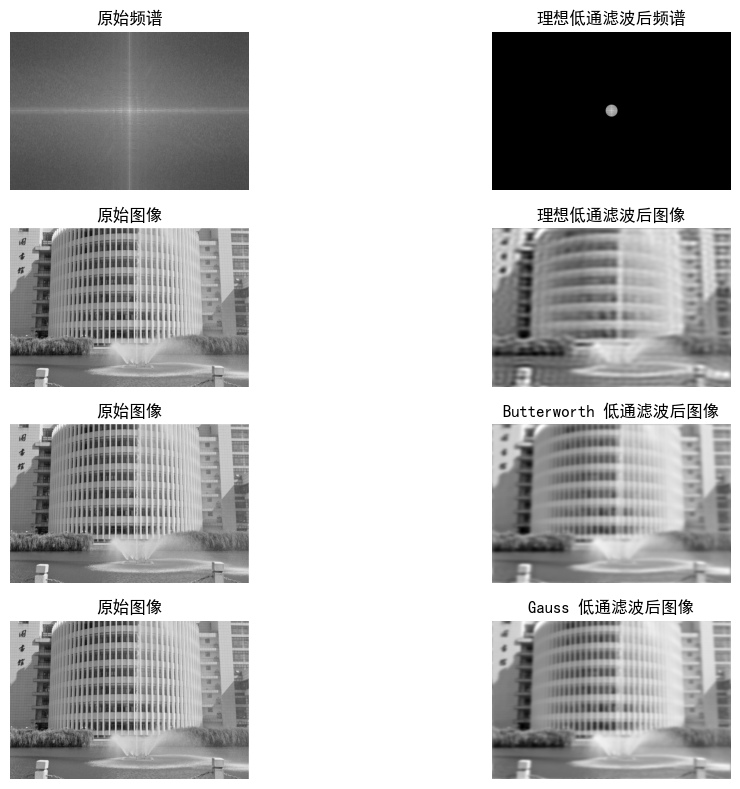

In [21]:
import cv2
import numpy as np
from math import sqrt
from matplotlib import pyplot as plt

# 读取图像
image = cv2.imread("D:/picture/school.png", cv2.IMREAD_GRAYSCALE)

# 1. 快速傅里叶变换 (FFT)
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)  # 将零频率分量移到频谱中心
fimg = np.log(np.abs(fshift) + 1)  # 获取频谱图的振幅并取对数

# 2. 实现理想低通滤波器
D = 30  # 设定低通滤波器的截止频率
rows, cols = image.shape
crow, ccol = int(rows / 2), int(cols / 2)  # 计算频谱中心
# 创建低通滤波器的掩膜
mask0 = np.zeros((rows, cols), np.uint8)
for i in range(rows):
    for j in range(cols):
        dis0 = sqrt((i - crow) ** 2 + (j - ccol) ** 2)
        if dis0 <= D:
            mask0[i, j] = 1

# 3. 应用掩膜进行频域滤波
f0_shift = fshift * mask0  # 频谱滤波
f0_ishift = np.fft.ifftshift(f0_shift)  # 将频谱移回原位置
img_back0 = np.fft.ifft2(f0_ishift)  # 进行逆傅里叶变换
img_back0 = np.abs(img_back0)  # 取绝对值得到图像

# 4. 实现 Butterworth 低通滤波器
n = 2   # Butterworth 滤波器的阶数
transfor_matrix = np.zeros(image.shape)

# 创建 Butterworth 滤波器的掩膜
for i in range(rows):
    for j in range(cols):
        dis1 = sqrt((i - crow) ** 2 + (j - ccol) ** 2)
        transfor_matrix[i, j] = 1 / (1 + (dis1 / D) ** (2 * n))

# 5. 应用 Butterworth 低通滤波器
f1_shift = fshift * transfor_matrix  # 频谱滤波
f1_ishift = np.fft.ifftshift(f1_shift)  # 将频谱移回原位置
img_back1 = np.fft.ifft2(f1_ishift)  # 进行逆傅里叶变换
img_back1 = np.abs(img_back1)  # 取绝对值得到图像

# 6. 实现高斯低通滤波器
transfor_matrix2 = np.zeros(image.shape)

# 创建高斯滤波器的掩膜
for i in range(rows):
    for j in range(cols):
        dis2 = sqrt((i - crow) ** 2 + (j - ccol) ** 2)
        transfor_matrix2[i, j] = np.exp(-dis2 ** 2 / (2 * D ** 2))

# 7. 应用高斯低通滤波器
f2_shift = fshift * transfor_matrix2  # 频谱滤波
f2_ishift = np.fft.ifftshift(f2_shift)  # 将频谱移回原位置
img_back2 = np.fft.ifft2(f2_ishift)  # 进行逆傅里叶变换
img_back2 = np.abs(img_back2)  # 取绝对值得到图像

# 8. 绘图显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体显示中文
plt.rcParams['axes.unicode_minus'] = False    # 解决负号显示问题

plt.figure(figsize=(12, 8))

# 显示原始频谱图
plt.subplot(421)
plt.imshow(fimg, cmap='gray')
plt.title('原始频谱')
plt.axis('off')

# 显示理想低通滤波后的图像
plt.subplot(422)
plt.imshow(np.log(np.abs(f0_shift) + 1), cmap='gray')
plt.title('理想低通滤波后频谱')
plt.axis('off')

# 显示原始图像
plt.subplot(423)
plt.imshow(image, cmap='gray')
plt.title('原始图像')
plt.axis('off')

# 显示理想低通滤波后的图像
plt.subplot(424)
plt.imshow(img_back0, cmap='gray')
plt.title('理想低通滤波后图像')
plt.axis('off')

# 显示Butterworth低通滤波后的图像
plt.subplot(425)
plt.imshow(image, cmap='gray')
plt.title('原始图像')
plt.axis('off')

plt.subplot(426)
plt.imshow(img_back1, cmap='gray')
plt.title('Butterworth 低通滤波后图像')
plt.axis('off')

# 显示高斯低通滤波后的图像
plt.subplot(427)
plt.imshow(image, cmap='gray')
plt.title('原始图像')
plt.axis('off')

plt.subplot(428)
plt.imshow(img_back2, cmap='gray')
plt.title('Gauss 低通滤波后图像')
plt.axis('off')

plt.tight_layout()  # 自动调整子图间距
plt.show()
